In [1]:
import os
import re
dir = './results_sync_atomics_response_chan_c07/'
pattern = re.compile(r"results_ping_pong_sync_atomics_response_chan_7x[0-9]+")
files = [f for f in os.listdir(dir) if pattern.match(f)]
values = {}
for f in files:
    split = f.split('x')
    num_clients = int(split[1])
    f = open(dir + f, "r")
    p50 = 0
    qps = 0
    for line in f:
        if "p50" in line:
            p50 = int(re.search(r'value: \d+', line).group().removeprefix("value: "))
        if "qps" in line:
            qps = int(re.search(r' \d+', line).group().lstrip())
    values[num_clients] = (p50, qps)
for key in sorted(values):
    print("num clients %d p50 %d qps %d" % (key, values[key][0], values[key][1]))

num clients 1 p50 85 qps 11764
num clients 2 p50 89 qps 21689
num clients 4 p50 97 qps 37812
num clients 6 p50 108 qps 50162
num clients 8 p50 119 qps 57857
num clients 10 p50 131 qps 62263
num clients 12 p50 147 qps 62531
num clients 14 p50 158 qps 69413
num clients 16 p50 174 qps 72855
num clients 18 p50 189 qps 75208
num clients 20 p50 206 qps 77568
num clients 22 p50 223 qps 77909
num clients 24 p50 242 qps 78778
num clients 26 p50 258 qps 81182
num clients 28 p50 280 qps 81307
num clients 30 p50 301 qps 80732


[11764, 21689, 37812, 50162, 57857, 62263, 62531, 69413, 72855, 75208, 77568, 77909, 78778, 81182, 81307, 80732]
[85, 89, 97, 108, 119, 131, 147, 158, 174, 189, 206, 223, 242, 258, 280, 301]


(0.0, 84784.15)

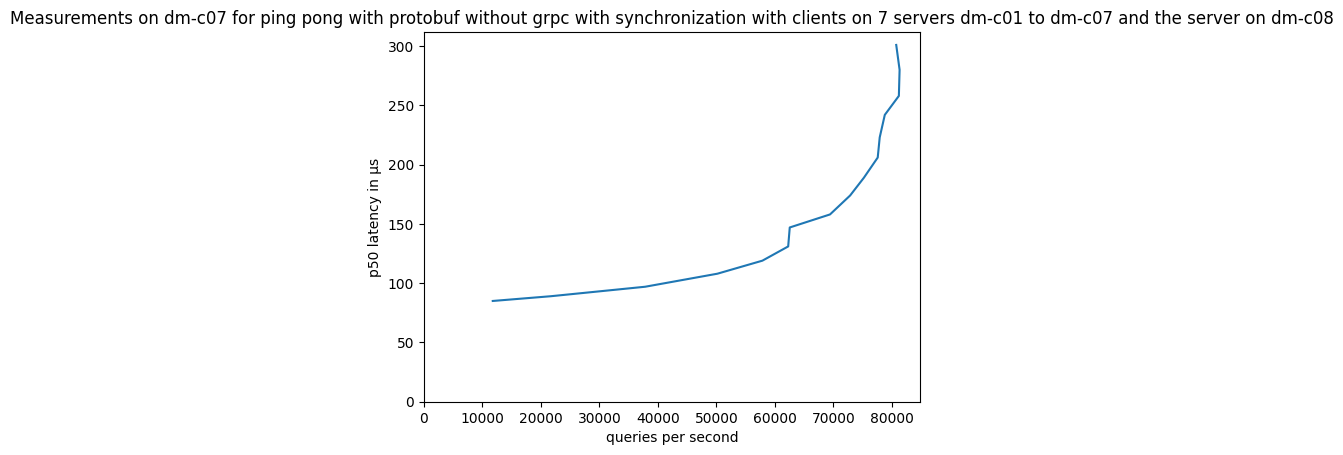

In [2]:
import matplotlib.pyplot as plt

x_values = [values[key][1] for key in sorted(values) if key < 50]
y_values = [values[key][0] for key in sorted(values) if key < 50]
print(x_values)
print(y_values)
plt.xlabel("queries per second")
plt.ylabel("p50 latency in μs")
plt.title('Measurements on dm-c07 for ping pong with protobuf without grpc with synchronization with clients on 7 servers dm-c01 to dm-c07 and the server on dm-c08')
plt.plot(x_values, y_values)
plt.ylim(ymin=0)
plt.xlim(xmin=0)